# Muhammad Ali

Thời lượng ước tính: **120** phút

## Giới thiệu Lab
Trong quá trình trưởng thành, ai cũng hâm mộ một vị anh hùng. Đối với nhiều người, vị anh hùng đó là Muhammad Ali. Ông ấy dạy mọi người nên tự hào về con người của họ, kể cả vào thời điểm mà những người khác sẽ không chấp nhận điều đó. Ông đã chỉ cho mọi người cách đứng lên bảo vệ niềm tin khi đối mặt với áp bức và bạo quyền. Ông giúp mọi người đánh giá cao bản thân và khuyến khích họ quan tâm đến những người xung quanh. Ông đã cho chúng ta thấy bản lĩnh thực sự có nghĩa là gì, làm thế nào để trở thành một võ sĩ quyền anh, và nhiều hơn thế nữa. Tất cả những người từng gặp Muhammad Ali, dù là trên hay ngoài võ đài đều có một câu chuyện đầy động lực để chia sẻ về cuộc gặp gỡ của họ.

Vào ngày 3 tháng 6 năm 2016, Muhammad Ali qua đời ở tuổi 74 do sốc nhiễm trùng. Trước đó 30 năm, ông được chẩn đoán mắc hội chứng Parkinson, một tình trạng thoái hóa thần kinh mà các bác sĩ cho rằng do chấn thương não liên quan đến quyền anh.

Bản thân bệnh Parkinson là một rối loạn lâu dài của hệ thần kinh, ảnh hưởng đến nhiều khía cạnh vận động của một người theo thời gian. Người bệnh này có đặc điểm là run, di chuyển chậm, cứng nhắc, sa sút trí tuệ và trầm cảm. Vào năm 2013, khoảng 53 triệu người được chẩn đoán mắc bệnh này, chủ yếu là nam giới. Những nhân vật nổi tiếng khác bị ảnh hưởng bởi nó gồm diễn viên Michael J. Fox, và vận động viên đua xe đạp Olympic Davis Phinney.

Trong lab này, bạn sẽ áp dụng SVC cho [Tập dữ liệu Parkinson](https://archive.ics.uci.edu/ml/datasets/Parkinsons), được cung cấp bởi Machine Learning Repository của UCI. Tập dữ liệu được thực hiện ở Đại học Oxford, với sự hợp tác của 10 trung tâm y tế trên khắp Hoa Kỳ cùng với Intel, tổ chức đã phát triển thiết bị được sử dụng để ghi lại các thuộc tính chính của tập dữ liệu: tín hiệu giọng nói. Mục tiêu của bạn đối với lab này trước tiên là xem liệu có thể phân biệt được những người bị và không bị Parkinson sử dụng công cụ phân loại vectơ hỗ trợ của SciKit-Learn hay không, và sau đó là tìm hiểu một cách thuần phác trong việc tinh chỉnh các thông số với nỗ lực tối đa hóa độ chính xác của testing set.

"Tôi chưa bao giờ thực sự chán nản với những việc khó khăn bởi vì tôi luôn thích nó. Thức dậy mỗi sáng để làm việc trên đường. Đến phòng tập thể dục hàng ngày lúc 12 giờ. Tôi không bao giờ thay đổi khuôn khổ của mình."

## Chu kỳ 1

Load **parkinsons.data** vào biến **X**, hãy chắc chắn rằng bạn bỏ cột name.


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("/content/parkinsons.data").drop("name", axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Ghép cột status vào biến **y** và xóa nó khỏi **X**.

In [3]:
y = X["status"]
X = X.drop("status", axis=1)
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

Thực hiện train/test split. **30**% kích thước nhóm test, với random_state bằng **7**.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(136, 22) (136,)
(59, 22) (59,)


Tạo bộ phân loại SVC. Không chỉ định bất kỳ tham số nào, chỉ để mọi thứ như mặc định. So khớp nó với dữ liệu huấn luyện và sau đó chấm điểm dữ liệu test với độ chính xác và F1 score.

In [6]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

F1 score: Là số dung hòa Recall và Precision giúp ta có căn cứ để lựa chọn model. F1 càng cao càng tốt

Jaccard cũng có thể được ứng dụng trong Recommendation System

In [7]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
yhat[0:5]
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average = 'weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat, pos_label = 1)) # tỉ lệ của giữa phần giao và phần hợp của 2 tập hợp

Avg F1-score: 0.8597
Jaccard score: 0.8462


## Chu kỳ 2


Độ chính xác đó quá thấp để trở nên hữu dụng. Chúng ta cần phải cải thiện nó. Bạn có thể thực hiện thử theo cách thủ công một loạt các kết hợp của **C và các giá trị gamma cho nhân rbf**. Nhưng điều đó có thể tốn rất nhiều thời gian. Ngoài ra, bạn có thể vô tình bỏ qua một cặp giá trị có thể dẫn đến độ chính xác rất tốt.

Thay vào đó, hãy tận dụng ưu điểm của máy tính. Lập trình tìm kiếm thông số tốt nhất đơn giản bằng cách tạo các vòng lặp for lồng nhau. Vòng lặp for bên ngoài sẽ lặp lại biến **C từ 0,05 đến 2, sử dụng tăng tiến đơn vị 0,05**. Vòng lặp for bên trong sẽ tăng biến **gamma từ 0,001 đến 0,1, sử dụng tăng tiến đơn vị 0,001**. Như bạn đã biết, Python range sẽ không cho phép khoảng thời gian thực, vì thế bạn sẽ phải thực hiện một số nghiên cứu về NumPy ARanges nếu bạn chưa biết cách sử dụng chúng.

Vì mục tiêu là tìm các tham số dẫn đến mô hình có hệ số chính xác tốt nhất, bạn sẽ cần biến **best_score = 0 mà bạn khởi tạo bên ngoài vòng lặp for.** Trong vòng lặp for bên trong, hãy tạo mô hình SVC và chuyển tham số C và gamma vào hàm tạo lớp. Huấn luyện và cho điểm mô hình một cách thích hợp. Nếu best_score hiện tại nhỏ hơn hệ số của mô hình, hãy cập nhật best_score để đảm bảo in nó ra cùng với các giá trị C và gamma dẫn đến nó.

Sau khi chạy lại lab, độ chính xác cao nhất và hệ số F1 mà bạn có thể nhận được là bao nhiêu?

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

gamma là kernel coefficient

In [8]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score) 

0.7627118644067796


In [9]:
import numpy as np

best_score = 0

for i in np.arange(start = 0.05, stop = 2, step = 0.05): #variable C from 0.05 to 2, using 0.05 unit increments
    for j in np.arange(start = 0.001, stop = 0.1, step = 0.001): #Tvariable gamma from 0.001 to 0.1, using 0.001 unit increments
        #creating a SVC model
        model = SVC(C = i, gamma = j)
        #training the data
        model.fit(X_train, y_train)
        # TODO: Calculate the score of your SVC against the testing data
        score = model.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_C = model.C
            best_gamma = model.gamma
print ("The highest score obtained:", best_score) 
print ("C value:", best_C) 
print ("gamma value:", best_gamma) 

The highest score obtained: 0.9152542372881356
C value: 1.6500000000000001
gamma value: 0.005


## Chu kỳ 3

Đợi một chút. Kéo mở tệp nhãn của tập dữ liệu từ: https://archive.ics.uci.edu/ml/datasets/Parkinsons

Nhìn vào các đơn vị trên các cột: **Hz,%, Abs, dB, ...** Điều gì đã xảy ra với việc chuyển đổi dữ liệu? Tất cả các đơn vị đó tương tác với nhau, một số quá trình tiền xử lý chắc chắn là theo thứ tự.
Ngay sau khi bạn định dạng trước train/test split nhưng trước khi bạn huấn luyện mô hình, hãy nhập code tiền xử lý của SciKit-Learn. Trừ khi bạn biết rõ cái nào sẽ hoạt động tốt nhất, nếu không bạn sẽ phải thử từng bộ tiền xử lý khác nhau, kiểm tra xem chúng có cải thiện độ chính xác dự đoán hay không.

Hãy thử với ***Normalizer(), MaxAbsScaler(), MinMaxScaler(), KernelCenterer(), and StandardScaler().***

Sau khi thử tất cả các tỷ lệ này, độ chính xác cao nhất mới và hệ số F1 mà bạn có thể đạt được là bao nhiêu?

(130, 22)
(65, 22)
Training set score: 0.8615384615384616
Test set score: 0.9230769230769231
Training set score: 0.9461538461538461
Test set score: 0.9230769230769231
Training set score: 1.0
Test set score: 0.9230769230769231
{'classifier__leaf_size': 1, 'classifier__n_neighbors': 1, 'classifier__p': 2, 'scaler': MaxAbsScaler(), 'selector__threshold': 0.01}
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0.01)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=1))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


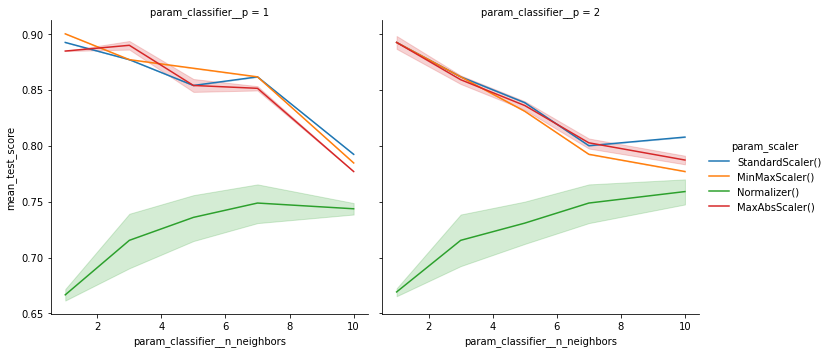

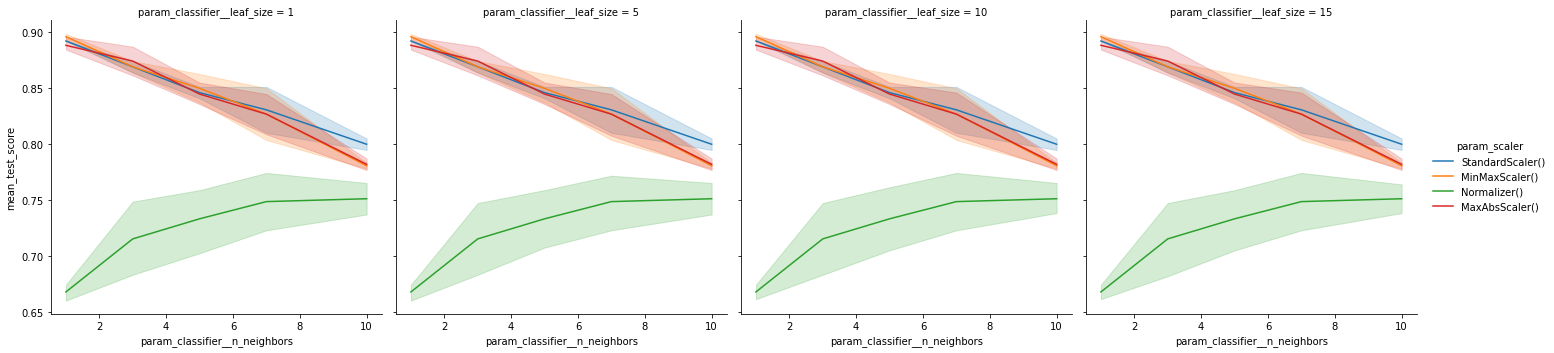

In [57]:
from pandas import read_csv                           # For dataframes
from pandas import DataFrame                       # For dataframes
from numpy import ravel                                  # For matrices
import matplotlib.pyplot as plt                        # For plotting data
import seaborn as sns                                     # For plotting data
from sklearn.model_selection import train_test_split    # For train/test splits
from sklearn.neighbors import KNeighborsClassifier    # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline                                  # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV      # For optimization


# Read ecoli dataset from the UCI ML Repository and store in
# dataframe df
url = '/content/parkinsons.data'
df = read_csv(url)
y, X = df['status'].values, df.drop(['name','status'], axis=1)

# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=1/3,
    random_state=0)

print(X_train.shape)
print(X_test.shape)

knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
	'classifier__n_neighbors': [1, 3, 5, 7, 10],
	'classifier__p': [1, 2],
	'classifier__leaf_size': [1, 5, 10, 15]
}

grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')
plt.show()

sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()

>MinMaxScaler: 0.844 (0.092)
>StandardScaler: 0.850 (0.097)


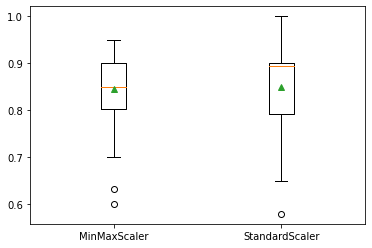

In [59]:
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
# compare data preparation methods for the wine classification dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot

# prepare the dataset
def load_dataset():
	# load the dataset
	url = '/content/parkinsons.data'
	df = read_csv(url)
	y, X = df['status'].values, df.drop(['name','status'], axis=1)
	# minimally prepare dataset
	X = X.astype('float')
	y = LabelEncoder().fit_transform(y.astype('str'))
	return X, y

# evaluate a model
def evaluate_model(X, y, model):
	# define the cross-validation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get modeling pipelines to evaluate
def get_pipelines(model):
	pipelines = list()
	# normalize
	p = Pipeline([('s',MinMaxScaler()), ('m',model)])
	pipelines.append(('MinMaxScaler', p))
	# standardize
	p = Pipeline([('s',StandardScaler()), ('m',model)])
	pipelines.append(('StandardScaler', p))
  # pairwise_kernels
  # p = Pipeline([('s', Normalizer()), ('m', model)])
  # pipelines.append(('Normalizer', p))
	# quantile
	# p = Pipeline([('s',QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m',model)])
	# pipelines.append(('QuantileTransformer', p))
	# # discretize
	# p = Pipeline([('s',KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')), ('m',model)])
	# pipelines.append(('KBinsDiscretizer', p))
	# # pca
	# p = Pipeline([('s',PCA(n_components=7)), ('m',model)])
	# pipelines.append(('pca', p))
	# # svd
	# p = Pipeline([('s',TruncatedSVD(n_components=7)), ('m',model)])
	# pipelines.append(('TruncatedSVD', p))
	return pipelines

# get the dataset
X, y = load_dataset()
# define the model
model = LogisticRegression(solver='liblinear')
# get the modeling pipelines
pipelines = get_pipelines(model)
# evaluate each pipeline
results, names = list(), list()
for name, pipeline in pipelines:
	# evaluate
	scores = evaluate_model(X, y, pipeline)
	# summarize
	print('>%s: %.3f (%.3f)' % (name, mean(scores), std(scores)))
	# store
	results.append(scores)
	names.append(name)
# plot the result
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Trong trường hợp này, chúng ta có thể thấy rằng mô hình QuantileTransformer phù hợp với dữ liệu đầu vào thô đạt được độ chính xác phân loại trung bình khoảng 87.4 phần trăm, cung cấp hiệu suất cơ sở.

In [38]:
# get modeling pipelines to evaluate
def get_pipelines(model):
	pipelines = list()
	# standardize
	p = Pipeline([('s',StandardScaler()), ('r', RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=10)), ('m',model)])
	pipelines.append(('std', p))
	# scale and power
	p = Pipeline([('s',MinMaxScaler((1,2))), ('p', PowerTransformer()), ('m',model)])
	pipelines.append(('power', p))
	return pipelines

>std: 0.833 (0.109)
>power: 0.872 (0.093)


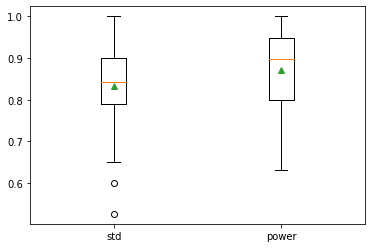

In [39]:
# compare sequences of data preparation methods for the wine classification dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import RFE
from matplotlib import pyplot

# prepare the dataset
def load_dataset():
	# load the dataset
	url = '/content/parkinsons.data'
	df = read_csv(url)
	y, X = df['status'].values, df.drop(['name','status'], axis=1)
	# minimally prepare dataset
	X = X.astype('float')
	y = LabelEncoder().fit_transform(y.astype('str'))
	return X, y

# evaluate a model
def evaluate_model(X, y, model):
	# define the cross-validation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get modeling pipelines to evaluate
def get_pipelines(model):
	pipelines = list()
	# standardize
	p = Pipeline([('s',StandardScaler()), ('r', RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=10)), ('m',model)])
	pipelines.append(('std', p))
	# scale and power
	p = Pipeline([('s',MinMaxScaler((1,2))), ('p', PowerTransformer()), ('m',model)])
	pipelines.append(('power', p))
	return pipelines

# get the dataset
X, y = load_dataset()
# define the model
model = LogisticRegression(solver='liblinear')
# get the modeling pipelines
pipelines = get_pipelines(model)
# evaluate each pipeline
results, names = list(), list()
for name, pipeline in pipelines:
	# evaluate
	scores = evaluate_model(X, y, pipeline)
	# summarize
	print('>%s: %.3f (%.3f)' % (name, mean(scores), std(scores)))
	# store
	results.append(scores)
	names.append(name)
# plot the result
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Trong trường hợp này, chúng ta có thể thấy rằng việc standardization với lựa chọn tính năng cung cấp thêm độ chính xác từ 83.3 % đến 87.2 %.

In [61]:
url = '/content/parkinsons.data'
df = read_csv(url)
y, X = df['status'].values, df.drop(['name','status'], axis=1)
# minimally prepare dataset
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))

In [62]:
T = preprocessing.Normalizer().fit_transform(X) #this gives the **lowest** accuracy
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size=0.3, random_state=7)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score) 

0.7966101694915254


In [63]:
T = preprocessing.MaxAbsScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size=0.3, random_state=7)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score) 

0.8813559322033898


In [68]:
T = preprocessing.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size=0.3, random_state=7)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score) 

0.9152542372881356


In [69]:
T = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size=0.3, random_state=7)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score) 

0.9152542372881356


In [72]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X.shape)

(136, 22) (136,)
(59, 22) (59,)
(195, 22)


In [73]:
from sklearn.preprocessing import KernelCenterer
from sklearn.metrics.pairwise import pairwise_kernels

In [66]:
T = preprocessing.Normalizer().fit_transform(X) #this gives the **lowest** accuracy
T = preprocessing.MaxAbsScaler().fit_transform(X)
T = preprocessing.MinMaxScaler().fit_transform(X)
# T = preprocessing.KernelCenterer().fit_transform(X)
T = preprocessing.StandardScaler().fit_transform(X) #this gives the **highets** accuracy
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size=0.3, random_state=7)